<h1>MAP ESTIMATION</h1>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><msub><mover accent="true"><mi>θ</mi><mo>^</mo></mover><mtext>MAP</mtext></msub><mo>=</mo><mi>arg</mi><mo>⁡</mo><msub><mrow><mi>max</mi><mo>⁡</mo></mrow><mi>θ</mi></msub><mrow><mo fence="true">[</mo><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mi mathvariant="normal">∣</mi><mtext>data</mtext><mo stretchy="false">)</mo><mo>∝</mo><mi>P</mi><mo stretchy="false">(</mo><mtext>data</mtext><mi mathvariant="normal">∣</mi><mi>θ</mi><mo stretchy="false">)</mo><mo>⋅</mo><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mo stretchy="false">)</mo><mo fence="true">]</mo></mrow></mrow><annotation encoding="application/x-tex">\hat{\theta}_{\text{MAP}} = \arg \max_\theta \left[ P(\theta | \text{data}) \propto P(\text{data} | \theta) \cdot P(\theta) \right]</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.1079em; vertical-align: -0.15em;"></span><span class="mord"><span class="mord accent"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 0.9579em;"><span style="top: -3em;"><span class="pstrut" style="height: 3em;"></span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span></span><span style="top: -3.2634em;"><span class="pstrut" style="height: 3em;"></span><span class="accent-body" style="left: -0.1667em;"><span class="mord">^</span></span></span></span></span></span></span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3283em;"><span style="top: -2.55em; margin-left: -0.0278em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">MAP</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop">ar<span style="margin-right: 0.01389em;">g</span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mop"><span class="mop">max</span><span class="msupsub"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.3361em;"><span style="top: -2.55em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mathnormal mtight" style="margin-right: 0.02778em;">θ</span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.15em;"><span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="minner"><span class="mopen delimcenter" style="top: 0em;">[</span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mord">∣</span><span class="mord text"><span class="mord">data</span></span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∝</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord text"><span class="mord">data</span></span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">⋅</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span><span class="mclose delimcenter" style="top: 0em;">]</span></span></span></span></span></span></p>
<h3>Importing libraries</h3>

In [90]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Tuple

<h3>define the Likelihood function</h3>

In [91]:
def likelihood(params, data):
    mean, std = params
    log_likelihood = -0.5 * np.sum(np.log(2 * np.pi * std**2) + ((data - mean) / std)**2)
    return log_likelihood

<h3>define the Prior function</h3>
<p>if mue<sub>0</sub> and variance<sub>0</sub> is the prior parameters;</p>
<p>then we calculate the prior due to the mue and variance:</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>Prior</mtext><mo stretchy="false">(</mo><mi>θ</mi><mo stretchy="false">)</mo><mo>=</mo><mo>−</mo><mfrac><mn>1</mn><mn>2</mn></mfrac><msup><mrow><mo fence="true">(</mo><mfrac><mrow><mi>θ</mi><mo>−</mo><mtext>prior_mean</mtext></mrow><mtext>prior_std_dev</mtext></mfrac><mo fence="true">)</mo></mrow><mn>2</mn></msup><mo>−</mo><mi>log</mi><mo>⁡</mo><mo stretchy="false">(</mo><mtext>prior_std_dev</mtext><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\text{Prior}(\theta) = -\frac{1}{2} \left(\frac{\theta - \text{prior\_mean}}{\text{prior\_std\_dev}}\right)^2 - \log(\text{prior\_std\_dev})</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord text"><span class="mord">Prior</span></span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">=</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 2.004em; vertical-align: -0.65em;"></span><span class="mord">−</span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 0.8451em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">2</span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.394em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mtight">1</span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.345em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="minner"><span class="minner"><span class="mopen delimcenter" style="top: 0em;"><span class="delimsizing size2">(</span></span><span class="mord"><span class="mopen nulldelimiter"></span><span class="mfrac"><span class="vlist-t vlist-t2"><span class="vlist-r"><span class="vlist" style="height: 1.0131em;"><span style="top: -2.655em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord text mtight"><span class="mord mtight">prior_std_dev</span></span></span></span></span><span style="top: -3.23em;"><span class="pstrut" style="height: 3em;"></span><span class="frac-line" style="border-bottom-width: 0.04em;"></span></span><span style="top: -3.527em;"><span class="pstrut" style="height: 3em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight"><span class="mord mathnormal mtight" style="margin-right: 0.02778em;">θ</span><span class="mbin mtight">−</span><span class="mord text mtight"><span class="mord mtight">prior_mean</span></span></span></span></span></span><span class="vlist-s">​</span></span><span class="vlist-r"><span class="vlist" style="height: 0.562em;"><span></span></span></span></span></span><span class="mclose nulldelimiter"></span></span><span class="mclose delimcenter" style="top: 0em;"><span class="delimsizing size2">)</span></span></span><span class="msupsub"><span class="vlist-t"><span class="vlist-r"><span class="vlist" style="height: 1.354em;"><span style="top: -3.6029em; margin-right: 0.05em;"><span class="pstrut" style="height: 2.7em;"></span><span class="sizing reset-size6 size3 mtight"><span class="mord mtight">2</span></span></span></span></span></span></span></span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">−</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1.06em; vertical-align: -0.31em;"></span><span class="mop">lo<span style="margin-right: 0.01389em;">g</span></span><span class="mopen">(</span><span class="mord text"><span class="mord">prior_std_dev</span></span><span class="mclose">)</span></span></span></span></span></p>
<p>Where:</p>
<ul><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>θ</mi></mrow><annotation encoding="application/x-tex">\theta</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.6944em;"></span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span></span></span></span></span> is the parameter of interest (in this case, the mean).</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>prior_mean</mtext></mrow><annotation encoding="application/x-tex">\text{prior\_mean}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 0.9779em; vertical-align: -0.31em;"></span><span class="mord text"><span class="mord">prior_mean</span></span></span></span></span></span> is the mean of the prior distribution (fixed constant, set to 0 in this example).</li><li><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mtext>prior_std_dev</mtext></mrow><annotation encoding="application/x-tex">\text{prior\_std\_dev}</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1.0044em; vertical-align: -0.31em;"></span><span class="mord text"><span class="mord">prior_std_dev</span></span></span></span></span></span> is the standard deviation of the prior distribution (fixed constant, set to 10 in this example).</li></ul>

In [92]:
def prior(priorParams, params):
    mean = priorParams[0]
    return -0.5 * ((params[0] - mean) / priorParams[1])**2 - np.log(priorParams[1])

<h3>define the Posterior function</h3>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mi mathvariant="normal">∣</mi><mtext>data</mtext><mo stretchy="false">)</mo><mo>∝</mo><mi>P</mi><mo stretchy="false">(</mo><mtext>data</mtext><mi mathvariant="normal">∣</mi><mi>θ</mi><mo stretchy="false">)</mo><mo>⋅</mo><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">P(\theta | \text{data}) \propto P(\text{data} | \theta) \cdot P(\theta)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mord">∣</span><span class="mord text"><span class="mord">data</span></span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∝</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord text"><span class="mord">data</span></span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">⋅</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span></span></span></span></span></p>
<p>In the logarithmic space (which is often used for numerical stability), this becomes:</p>
<p><span class="math math-inline"><span class="katex"><span class="katex-mathml"><math xmlns="http://www.w3.org/1998/Math/MathML"><semantics><mrow><mi>log</mi><mo>⁡</mo><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mi mathvariant="normal">∣</mi><mtext>data</mtext><mo stretchy="false">)</mo><mo>∝</mo><mi>log</mi><mo>⁡</mo><mi>P</mi><mo stretchy="false">(</mo><mtext>data</mtext><mi mathvariant="normal">∣</mi><mi>θ</mi><mo stretchy="false">)</mo><mo>+</mo><mi>log</mi><mo>⁡</mo><mi>P</mi><mo stretchy="false">(</mo><mi>θ</mi><mo stretchy="false">)</mo></mrow><annotation encoding="application/x-tex">\log P(\theta | \text{data}) \propto \log P(\text{data} | \theta) + \log P(\theta)</annotation></semantics></math></span><span class="katex-html" aria-hidden="true"><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop">lo<span style="margin-right: 0.01389em;">g</span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mord">∣</span><span class="mord text"><span class="mord">data</span></span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2778em;"></span><span class="mrel">∝</span><span class="mspace" style="margin-right: 0.2778em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop">lo<span style="margin-right: 0.01389em;">g</span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord text"><span class="mord">data</span></span><span class="mord">∣</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span><span class="mspace" style="margin-right: 0.2222em;"></span><span class="mbin">+</span><span class="mspace" style="margin-right: 0.2222em;"></span></span><span class="base"><span class="strut" style="height: 1em; vertical-align: -0.25em;"></span><span class="mop">lo<span style="margin-right: 0.01389em;">g</span></span><span class="mspace" style="margin-right: 0.1667em;"></span><span class="mord mathnormal" style="margin-right: 0.13889em;">P</span><span class="mopen">(</span><span class="mord mathnormal" style="margin-right: 0.02778em;">θ</span><span class="mclose">)</span></span></span></span></span></p>

In [93]:
def posterior(priorParams, params, data):
    return likelihood(params, data) + prior(priorParams, params)

<h3>define MAP search</h3>
<p>It's a search to find the best mean and variance due to the posterior function.</p>

In [94]:
def MAP_SEARCH(data, priorParams) -> Tuple:
    best_params: Tuple = ()
    best_posterior = -np.inf
    
    prior_mean, std_proir = priorParams
    
    tmp = max(data) if abs(prior_mean - max(data)) > abs(prior_mean - min(data)) else min(data)
    mean_range = np.linspace(prior_mean, tmp, 100)
    std_range = np.linspace(.1, abs(tmp - prior_mean), 100)
    
    for m in mean_range:
        for s in std_range:
            if posterior(priorParams, (m,s), data) > best_posterior:
                best_params = m,s
                best_posterior = posterior(priorParams, (m,s), data)
    
    return best_params

<h3>define data</h3>

In [95]:
priorParams = (10 , 10)
dataParams = (20, 5)
data = np.random.normal(loc=dataParams[0], scale=dataParams[1], size=10)
pm, ps = MAP_SEARCH(data, priorParams)
print(pm, ps)

20.190886022116963 4.338410922380224


<h3>Plotting</h3>

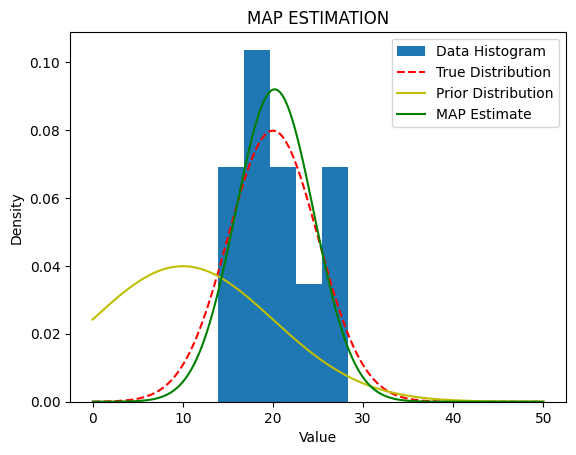

In [96]:
plt.figure()
plt.title("MAP ESTIMATION")
plt.hist(data, bins=5, density=True, label="Data Histogram")

from scipy import stats
x_values = np.linspace(0, 50, 1000)
true_distribution = stats.norm.pdf(x_values, loc=dataParams[0], scale=dataParams[1])
plt.plot(x_values, true_distribution, 'r--', label='True Distribution')

prior_distribution = stats.norm.pdf(x_values, loc=priorParams[0], scale=priorParams[1])
plt.plot(x_values, prior_distribution, 'y-', label='Prior Distribution')

map_distribution = stats.norm.pdf(x_values, loc=pm, scale=ps)
plt.plot(x_values, map_distribution, 'g-', label='MAP Estimate')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.show()
